### Q1. What is the mathematical formula for a linear SVM?

**Mathematical Formula**:
- The decision boundary in a linear SVM is represented by a hyperplane. The formula for this hyperplane is:

  w · x + b = 0

Where:
- **w** is the weight vector.
- **x** is the input feature vector.
- **b** is the bias term.

**Decision Rule**:
- For a given data point **x**:
  - If w · x + b ≥ 0, it is classified as one class.
  - If w · x + b < 0, it is classified as the other class.
e other class.
e other class.


### Q2. What is the objective function of a linear SVM?

**Objective Function**:
- The goal of a linear SVM is to find the optimal hyperplane that maximizes the margin between the two classes.

**Objective**:
- Minimize `1/2 * ||w||^2`, where `||w||` represents the norm of the weight vector.
- Subject to the constraint: `y_i * (w · x_i + b) ≥ 1` for each training example `i`.

**Explanation**:
- The first part of the objective function (`1/2 * ||w||^2`) aims to keep the margin as wide as possible.
- The constraint ensures that all data points are correctly classified and lie on the correct side of the margin.


### Q3. What is the kernel trick in SVM?

**Kernel Trick**:
- The kernel trick is a technique in SVM that allows the algorithm to perform classification in a higher-dimensional space without explicitly computing the coordinates of the data in that space.

**How it Works**:
- Instead of transforming the data to a higher-dimensional space, the kernel function computes the inner product of two data points in the higher-dimensional space directly.
- This allows SVM to find a non-linear decision boundary in the original feature space.

**Common Kernels**:
- Linear Kernel: `K(x, y) = x · y`
- Polynomial Kernel: `K(x, y) = (x · y + 1)^d`
- Radial Basis Function (RBF) Kernel: `K(x, y) = exp(-gamma * ||x - y||^2)`

**Benefits**:
- The kernel trick enables SVM to handle non-linearly separable data efficiently.


### Q4. What is the role of support vectors in SVM? Explain with an example

**Role of Support Vectors**:
- Support vectors are the data points that are closest to the decision boundary (or hyperplane) and lie on the edge of the margin.
- These points are crucial because they define the position of the hyperplane and, therefore, the decision boundary.

**Example**:
- Consider a simple binary classification problem where two classes are linearly separable. The support vectors are the points from each class that are closest to the decision boundary.
- If these points were removed or changed, the position of the hyperplane would shift.

**Importance**:
- Support vectors determine the margin width between the classes.
- The SVM model only depends on these support vectors, not on the entire dataset, making it efficient.

**Visual**:
- Imagine a 2D plot where two classes of points are separated by a line. The points that are closest to this line on either side are the support vectors.


### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM

**1. Hyperplane**:
- The hyperplane is the decision boundary that separates different classes in SVM.
- In a 2D space, this is a line; in 3D, it's a plane; and in higher dimensions, it's a hyperplane.

**2. Marginal Plane**:
- The marginal planes are the boundaries that define the margin, which is the distance between the hyperplane and the nearest data points (support vectors) from each class.

**3. Hard Margin**:
- A hard margin SVM assumes that the data is perfectly linearly separable and aims to maximize the margin without allowing any misclassifications.
- No data points are allowed inside the margin.

**4. Soft Margin**:
- A soft margin SVM allows some data points to lie within the margin or be misclassified to handle cases where the data is not perfectly linearly separable.
- It introduces a penalty for misclassified points, balancing margin maximization with misclassification.

**Visual Representation**:
- Create a plot with data points from two classes, and draw the hyperplane, marginal planes, and indicate the difference between hard and soft margins.


In [33]:
## Q6.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size= 0.3 , random_state = 42)

In [35]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(X_train,y_train)

y_pred_ = svr.predict(X_test)
y_pred_

array([ 1.25046402, -0.03579978,  2.27205484,  1.3522968 ,  1.31715769,
        0.00995635,  1.04348104,  1.82982857,  1.37364511,  1.06697429,
        1.70715824, -0.09409666, -0.16000431, -0.08156633, -0.03664216,
        1.4081839 ,  2.00859872,  1.04499053,  1.28275787,  1.97469538,
        0.00831367,  1.59813973,  0.07227636,  1.92387377,  1.90024347,
        1.88003944,  1.81550809,  2.04868905,  0.00754657,  0.00504722,
       -0.16684413, -0.07233411,  1.20147464, -0.0116815 , -0.04600603,
        1.68610643,  1.30019733, -0.07957774, -0.09441786, -0.1638568 ,
        1.74611664,  1.37523721,  1.33314402, -0.07182335, -0.1084156 ])

In [37]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_))

0.9426758461300704


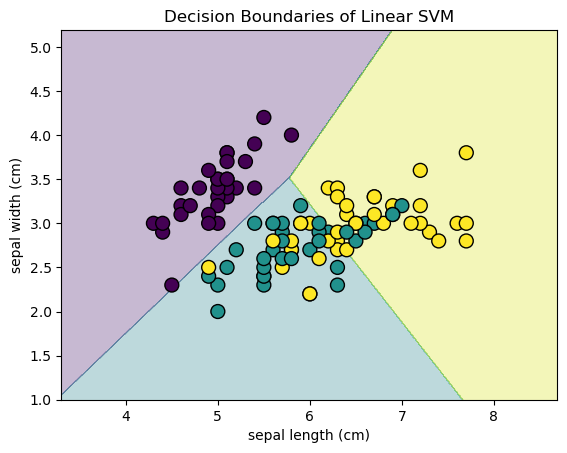

In [49]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
Xc = iris_data.data[:,:2]
yc = iris_data.target

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc,test_size= 0.3, random_state = 42)

svc_ = SVC(kernel = 'linear')
svc_.fit(Xc_train, yc_train)

def plot_decision_boundaries(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict labels for the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.xlabel(iris_data.feature_names[0])
    plt.ylabel(iris_data.feature_names[1])
    plt.title("Decision Boundaries of Linear SVM")
    plt.show()

# Call the function to plot the decision boundaries
plot_decision_boundaries(Xc_train, yc_train, svc_)

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

grid = GridSearchCV(SVR(),param_grid = param_grid , refit = True, cv = 5, verbose = 3)


In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.934 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.894 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [55]:
grid.best_params_

{'C': 0.1, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [57]:
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9380023136406288
